In [64]:

import os
import cv2
import shutil
import pickle
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV



In [6]:
# from google.colab import files
# files.upload()


In [7]:
zip_file_path = fr'C:\Users\mathe\repos\ThisIsMePCASVM\ThisIsMe.zip'
extract_dir = fr'C:\Users\mathe\repos\ThisIsMePCASVM\data'

shutil.unpack_archive(zip_file_path, extract_dir)


In [8]:
basedir = r"C:/Users/mathe/repos/ThisIsMePCASVM/data/ThisIsMe/"


In [9]:
turma_target_names = [f.name for f in os.scandir(basedir) if f.is_dir()]
turma_target_names


['Alexandre Araújo',
 'Anderson Schinaid',
 'André Teixeira',
 'Carlos Curioni',
 'Cassio Serrano',
 'Clarissa Mattos',
 'Cristtiane Moreira',
 'Deborah Godoi',
 'Eduardo Marques',
 'Eduardo Matos',
 'Elido Gonzalez',
 'Emily Costa',
 'Felipe Amorim',
 'Fernando Tamayose',
 'Flavio Vicentini',
 'Gabriel Agune',
 'Gabriel Mancini',
 'Gabriel Torrezan',
 'Gláucio Soares da Silva',
 'Guilherme Sousa',
 'Guilherme Vick',
 'Gustavo G Rigor',
 'Gustavo Gomes',
 'Hiero De Paula',
 'Higor Freire da Fonseca',
 'Icaro A Figaro',
 'Isaac Barella',
 'Joao Paulo Mota',
 'Jorge Filho',
 'José Patino',
 'Larissa Driemeier',
 'Leonardo Tumonis',
 'Lina Yoshida',
 'Luiz Claudio Dias Mendes',
 'Macmore Maziero',
 'Matias Herklotz',
 'Natália Goody',
 'Pedro Moraes',
 'Pedro Nunes Guth',
 'Rafael Costa Mendes',
 'Rafael Fernandes Cavalcante',
 'Ricardo Sahara',
 'Rodrigo Florencio',
 'Sergio H Teixeira',
 'Simone Brito',
 'Thais dos Santos Lino',
 'Vitor Ozols',
 'Wallace Galvao']

In [10]:
turma_data = []


In [11]:
basedir = fr"data/ThisIsMe/"


In [70]:

altura_ofw = 125
largura_ofw = 94
turma_data = []
turma_target = []
for i in range(len(turma_target_names)):
    included_extensions = ['jpg', 'jpeg']
    imagens = [fn for fn in os.listdir(os.path.join(basedir, turma_target_names[i]))
               if any(fn.endswith(ext) for ext in included_extensions)]

    for j in range(len(imagens)):
        path = os.path.join(basedir, turma_target_names[i], imagens[j])
        print(path)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (largura_ofw, altura_ofw))
            turma_data.append(img_resized.reshape(1, -1)[0])
            turma_target.append(i)


data/ThisIsMe/Alexandre Araújo\Alexandre (1).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (10).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (2).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (3).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (4).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (5).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (6).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (7).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (8).jpg
data/ThisIsMe/Alexandre Araújo\Alexandre (9).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (1).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (10).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (2).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (3).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (4).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (5).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (6).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (7).jpg
data/ThisIsMe/Alexandre Araújo\aug_0_Alexandre (8).jpg
data/ThisIsMe

In [68]:
turma_target[0], turma_target_names[0]


(1, 'Alexandre Araújo')

In [14]:
turma_data[0].shape


(11750,)

In [15]:
turma_data = np.array(turma_data)
turma_data[0].shape


(11750,)

In [ ]:

pca = PCA().fit(turma_data)

explained_variance = np.cumsum(pca.explained_variance_ratio_)



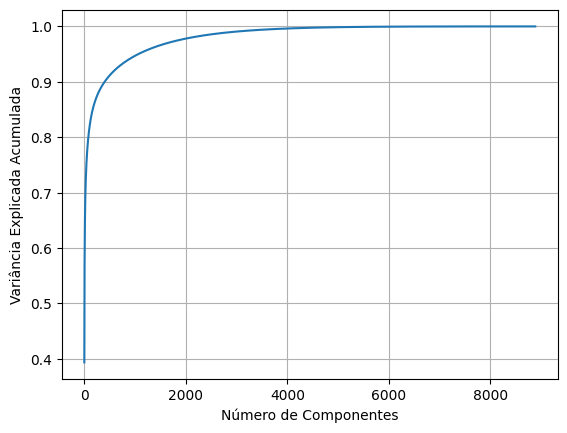

In [ ]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()


In [29]:
pca_2 = PCA(n_components=2000)
X_2 = pca_2.fit_transform(turma_data)

pca_3 = PCA(n_components=3000)
X_3 = pca_3.fit_transform(turma_data)

pca_4 = PCA(n_components=4000)
X_4 = pca_4.fit_transform(turma_data)


In [25]:
X_2.shape, X_3.shape, X_4.shape


((8883, 4000), (8883, 4000), (8883, 4000))

In [26]:
y = turma_target
len(y)


8883

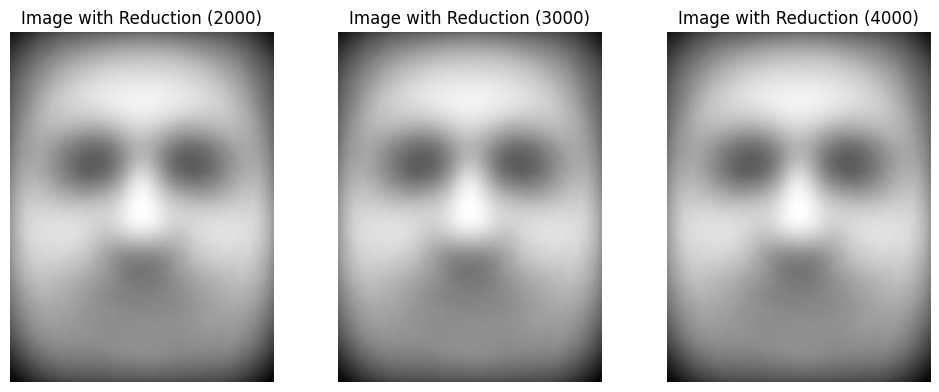

In [31]:

plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(pca_2.mean_.reshape(altura_ofw, largura_ofw), cmap='gray')
plt.title('Image with Reduction (2000)')
plt.axis('off')

plt.subplot(132)
plt.imshow(pca_3.mean_.reshape(altura_ofw, largura_ofw), cmap='gray')
plt.title('Image with Reduction (3000)')
plt.axis('off')

plt.subplot(133)
plt.imshow(pca_4.mean_.reshape(altura_ofw, largura_ofw), cmap='gray')
plt.title('Image with Reduction (4000)')
plt.axis('off')

plt.tight_layout()
plt.show()


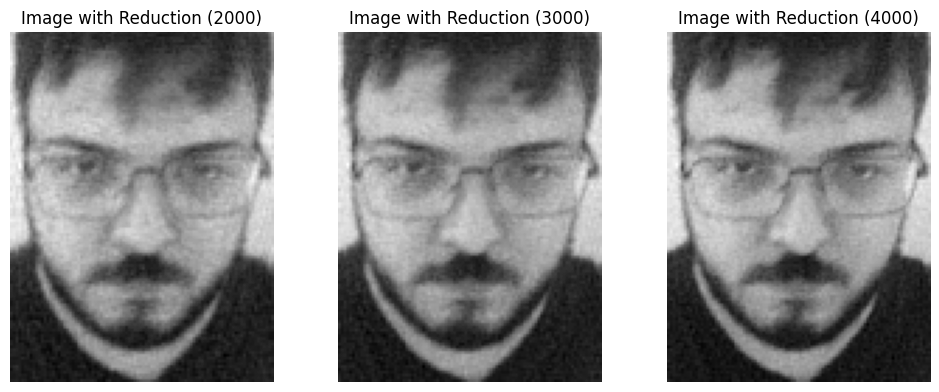

In [32]:
import matplotlib.pyplot as plt

image_reconstructed_2 = pca_2.inverse_transform(X_2[0])
image_reconstructed_3 = pca_3.inverse_transform(X_3[0])
image_reconstructed_4 = pca_4.inverse_transform(X_4[0])

image_reconstructed_reshaped_2 = image_reconstructed_2.reshape(altura_ofw, largura_ofw)
image_reconstructed_reshaped_3 = image_reconstructed_3.reshape(altura_ofw, largura_ofw)
image_reconstructed_reshaped_4 = image_reconstructed_4.reshape(altura_ofw, largura_ofw)

plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image_reconstructed_reshaped_2, cmap='gray')
plt.title('Image with Reduction (2000)')
plt.axis('off')

plt.subplot(132)
plt.imshow(image_reconstructed_reshaped_3, cmap='gray')
plt.title('Image with Reduction (3000)')
plt.axis('off')

plt.subplot(133)
plt.imshow(image_reconstructed_reshaped_4, cmap='gray')
plt.title('Image with Reduction (4000)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [33]:

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, test_size=0.2, random_state=42)


In [34]:
X_train_2.shape, X_test_2.shape, len(y_train_2), len(y_test_2)


((7106, 2000), (1777, 2000), 7106, 1777)

In [35]:
X_train_2


array([[-7.90757699e+03,  2.48516656e+03, -3.78342710e+02, ...,
         1.31533448e+01, -4.78769945e+01,  2.19166589e+01],
       [-6.38433001e+03,  8.56471614e+02,  2.76646336e+02, ...,
        -1.18574321e+01,  2.40609206e+01,  2.01488875e+01],
       [-5.39728760e+03,  4.21044467e+02,  1.10603453e+03, ...,
        -8.47768764e+00, -1.56136350e+01, -1.12388174e+01],
       ...,
       [ 3.26124844e+03,  3.02620710e+03,  3.18366791e+03, ...,
        -8.87551914e+00,  2.29829302e+01,  4.83639134e+00],
       [-1.05494254e+03, -2.83914426e+03, -5.73969970e+02, ...,
        -5.55955435e+01,  3.26787251e+01,  9.94160312e+01],
       [ 3.84865764e+03,  3.38800535e+03,  1.89027345e+03, ...,
         7.26190973e+00,  2.28705872e+01, -5.01536835e+01]])

In [ ]:
param_grid = {
    'C': [10, 100, 1000, 10000, 100000],
    'gamma': ['auto', 'scale', 0.001, 0.0001],
    'kernel': ['rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=5, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ......C=10, gamma=auto, kernel=rbf;, score=0.029 total time= 1.2min
[CV 2/5] END ......C=10, gamma=auto, kernel=rbf;, score=0.030 total time= 1.1min
[CV 3/5] END ......C=10, gamma=auto, kernel=rbf;, score=0.029 total time= 1.0min
[CV 4/5] END ......C=10, gamma=auto, kernel=rbf;, score=0.029 total time= 1.1min
[CV 5/5] END ......C=10, gamma=auto, kernel=rbf;, score=0.029 total time= 1.1min
[CV 1/5] END .....C=10, gamma=auto, kernel=poly;, score=0.532 total time=  41.8s
[CV 2/5] END .....C=10, gamma=auto, kernel=poly;, score=0.534 total time=  41.8s
[CV 3/5] END .....C=10, gamma=auto, kernel=poly;, score=0.531 total time=  41.9s
[CV 4/5] END .....C=10, gamma=auto, kernel=poly;, score=0.548 total time=  42.0s
[CV 5/5] END .....C=10, gamma=auto, kernel=poly;, score=0.529 total time=  42.7s
[CV 1/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.744 total time=  53.5s
[CV 2/5] END .....C=10, gamma=scale, kernel=rbf

In [36]:
param_grid = {
    'C': [1000],
    'gamma': ['auto', 'scale'],
    'kernel': ['rbf']
}

grid_2 = GridSearchCV(SVC(), param_grid, refit=True, verbose=7, cv=5, scoring='accuracy')
grid_2.fit(X_train_2, y_train_2)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  34.8s
[CV 2/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.030 total time=  34.3s
[CV 3/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  34.3s
[CV 4/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  35.0s
[CV 5/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  34.8s
[CV 1/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.742 total time=  26.9s
[CV 2/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.733 total time=  26.9s
[CV 3/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.738 total time=  26.9s
[CV 4/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.733 total time=  26.6s
[CV 5/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.729 total time=  26.6s


c:\Users\mathe\.virtualenvs\ThisIsMePCASVM-c7cj_RvQ\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1000], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=7)

In [37]:
param_grid = {
    'C': [1000],
    'gamma': ['auto', 'scale'],
    'kernel': ['rbf']
}

grid_3 = GridSearchCV(SVC(), param_grid, refit=True, verbose=7, cv=5, scoring='accuracy')
grid_3.fit(X_train_3, y_train_3)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  53.4s
[CV 2/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.030 total time=  54.3s
[CV 3/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  52.7s
[CV 4/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  53.0s
[CV 5/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time=  52.6s
[CV 1/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.739 total time=  47.6s
[CV 2/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.729 total time=  52.8s
[CV 3/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.738 total time=  51.1s
[CV 4/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.733 total time=  43.9s
[CV 5/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.721 total time=  43.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1000], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=7)

In [38]:
param_grid = {
    'C': [1000],
    'gamma': ['auto', 'scale'],
    'kernel': ['rbf']
}

grid_4 = GridSearchCV(SVC(), param_grid, refit=True, verbose=7, cv=5, scoring='accuracy')
grid_4.fit(X_train_4, y_train_4)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time= 1.3min
[CV 2/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.030 total time= 1.3min
[CV 3/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time= 1.3min
[CV 4/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time= 1.2min
[CV 5/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.029 total time= 1.3min
[CV 1/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.737 total time= 1.2min
[CV 2/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.727 total time= 1.5min
[CV 3/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.734 total time= 1.3min
[CV 4/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.729 total time= 1.4min
[CV 5/5] END ...C=1000, gamma=scale, kernel=rbf;, score=0.717 total time= 1.3min


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1000], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=7)

In [39]:
print("Best parameters found for 2000: ", grid_2.best_params_)
y_pred_2 = grid_2.predict(X_test_2)
print("Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Classification Report:\n", classification_report(y_test_2, y_pred_2))

print("---------------------------------------------")

print("Best parameters found for 3000: ", grid_3.best_params_)
y_pred_3 = grid_3.predict(X_test_3)
print("Accuracy:", accuracy_score(y_test_3, y_pred_3))
print("Classification Report:\n", classification_report(y_test_3, y_pred_3))

print("---------------------------------------------")

print("Best parameters found for 4000: ", grid_4.best_params_)
y_pred_4 = grid_4.predict(X_test_4)
print("Accuracy:", accuracy_score(y_test_4, y_pred_4))
print("Classification Report:\n", classification_report(y_test_4, y_pred_4))

print("---------------------------------------------")


Best parameters found for 2000:  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7563308947664603
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.75      0.74        60
           3       0.65      0.81      0.72        42
           4       0.46      0.59      0.52        41
           5       0.91      0.81      0.86        48
           6       0.85      0.88      0.86        40
           7       0.76      0.85      0.80        40
           8       0.57      0.56      0.56        45
           9       0.70      0.70      0.70        50
          10       0.62      0.74      0.67        38
          11       0.82      0.95      0.88        39
          12       0.97      0.90      0.94        41
          13       0.49      0.52      0.50        33
          14       0.78      0.97      0.86        36
          15       0.85      0.83      0.84        42
          16       0.85      0.87      0.86        45
  

In [65]:

pipeline = Pipeline([
    ('pca', pca_2),
    ('svm', grid_2)
])


In [66]:
with open('pca_svm_pipeline_with_labels.pkl', 'wb') as model_file:
    pickle.dump((pipeline, turma_target_names), model_file)
